# Введение в анализ текстов

-------------------------------

# 1. Работа с текстовыми переменными

## 1.1 Основные функции и методы

In [1]:
a = 'The word you are looking for is "Hello".'
a

'The word you are looking for is "Hello".'

In [2]:
b = "I'll wait you there"
b

"I'll wait you there"

In [3]:
c = '''Тройные кавычки.
Для строк с переносами.
Русский язык поддерживается из коробки.
Как и любой другой'''
c

'Тройные кавычки.\nДля строк с переносами.\nРусский язык поддерживается из коробки.\nКак и любой другой'

In [4]:
d = "And also" " you can " "split them in pieces"
d

'And also you can split them in pieces'

- спецсимволы **\n** - перенос  **\t** - табуляция  **\r** - возврат каретки

In [5]:
a = "name\tsurname\nMikey\tMouse"
print(a)

name	surname
Mikey	Mouse


In [6]:
# Строки можно сравнивать между собой
'a' < 'b' , 'test' < 'Hi'

(True, False)

In [7]:
# не всё так очевидно...
'ё' < 'я'

False

In [8]:
sorted('ёжикz8я/')

['/', '8', 'z', 'ж', 'и', 'к', 'я', 'ё']

In [9]:
ord('ё')

1105

In [10]:
ord('я')

1103

In [11]:
# смена регистра
hi = 'Всем привет!'
hi.upper(), hi.lower()

('ВСЕМ ПРИВЕТ!', 'всем привет!')

In [12]:
hi

'Всем привет!'

In [13]:
hi.title()

'Всем Привет!'

In [14]:
hi.title()

'Всем Привет!'

In [15]:
hi.swapcase()

'вСЕМ ПРИВЕТ!'

In [16]:
# Поиск по строкам
tea = 'Съешь ещё этих мягких чаю французских булок, да выпей же чаю!'
print(tea.count('е')) 

4


In [17]:
tea.find('чаю')

22

In [18]:
print(tea.rfind('чаю')) ## or tea.find tea.rfind tea.rindex

57


In [19]:
tea[53:]

' же чаю!'

In [20]:
# предикаты
"Телевизор".endswith("визор")   # also : startswith

True

In [21]:
"16E45".isalnum(), "16".isdigit(), "test".islower(), "q".isalpha(), "Test Me".istitle()

(True, True, True, True, True)

In [22]:
# split и join 

a = "ID\tNAME\tSURNAME\tCITY\tREGION\tAGE\tWEALTH\tREGISTERED"
print(a)
print(a.split())
print('~'.join(a.split()))

ID	NAME	SURNAME	CITY	REGION	AGE	WEALTH	REGISTERED
['ID', 'NAME', 'SURNAME', 'CITY', 'REGION', 'AGE', 'WEALTH', 'REGISTERED']
ID~NAME~SURNAME~CITY~REGION~AGE~WEALTH~REGISTERED


In [23]:
# Выравнивание 
a = "Luke Skywalker"
print(a.ljust(40, '~'))
print(a.rjust(40, '~'))
print(a.center(40, '~'))

Luke Skywalker~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~Luke Skywalker
~~~~~~~~~~~~~Luke Skywalker~~~~~~~~~~~~~


Попрубуем избавиться от пунктуации! :) 

In [24]:
# В модуле string есть всякие приятные мелочи :3 
import string  
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
string.digits

'0123456789'

In [26]:
ord('!')  # функция ord выдаёт номер символа из utf-8 таблицы

33

In [27]:
dct_translate = {ord(p): None for p in string.punctuation}

In [28]:
# метод translate позволяет менять одни символы на другие
a = 'Паша - Машин папаша! Азазаза, азазза...'
a.translate(dct_translate)

'Паша  Машин папаша Азазаза азазза'

Cпособ проще (но это неточно)

In [29]:
'папаша!'.strip('п')   # метод strip удаляет символы в начале и конце строки

'апаша!'

In [30]:
'папаша!'.strip(string.punctuation) 

'папаша'

In [31]:
clean_words = [w.strip(string.punctuation) for w in a.split(' ')]
print(clean_words)

['Паша', '', 'Машин', 'папаша', 'Азазаза', 'азазза']


In [32]:
a.strip(string.punctuation) 

'Паша - Машин папаша! Азазаза, азазза'

## 1.2 Регулярные выражения 

По мотивам [вот этой статьи.](https://tproger.ru/translations/regular-expression-python/)  Прочитайте её. Она прекрасна! 

In [33]:
import re

In [34]:
# Метод ищет по заданному шаблону в начале строки.
text = 'AV Analytics Vidhya AV'
a = re.match('AV', text)
a.group(), a.start(), a.end()

('AV', 0, 2)

In [35]:
y = re.match('Analytics', text)
print(y) # в начале строки AV поэтому None

None


In [36]:
# Метод ищет не только в начале строки, а везде. Возвращает первое найденное совпадение.
x = re.search('Analytics', text)
print(x.group())
print(x.start())
print(x.end())

Analytics
3
12


In [37]:
# Возвращает список из всех найденных совпадений.
x = re.findall('AV', text)
x

['AV', 'AV']

In [38]:
# сплит по указанной закономерности
re.split('i|a', 'Analytics Vidhya')

['An', 'lyt', 'cs V', 'dhy', '']

In [39]:
re.split('i|a', 'Analytics Vidhya', maxsplit=2)

['An', 'lyt', 'cs Vidhya']

In [40]:
# Ищет шаблон в строке и заменяет его.
re.sub('India', 'the World', 'AV is largest Analytics community of India')

'AV is largest Analytics community of the World'

## Специальные символы 


|символ|описание|
|------|--------|
|. | один любой символ, кроме новой строки \n |
|? | 0 или 1 вхождение шаблона слева |
|+ | 1 и более вхождений шаблона слева|
|* | 0 и более вхождений шаблона слева|
|\w| любая цифра или буква |
|\W| всё, кроме цифры или буквы|
|\d| любая цифра|
|\D| всё, кроме цифры|
|\s| любой пробельный символ|
|\S| любой непроблеьный символ|
|\b| граница слова|
|[..]| Один из символов в скобках|
|[^..] | Любой символ, кроме тех что в скобках|
|\ | Экранирование специальных символов (точки плюсы и тп)|
|^и$| Начало и конец строки соответственно |
|{n,m}| От n до m вхождений |
|{,m} | От 0 до m вхождений |
| a \| b | Соответствует a или b |
| (  ) | Группирует выражение и возвращает найденный текст| 
| \t \n \r | табуляция, новая строка, возврат каретки | 



Попробуем порешать пару задачек на регулярки. 

In [41]:
text = 'AV is largest Analytics community of India'

* Вернуть первые два символа каждого слова 

In [42]:
print(re.findall('(\w\w)\w+', text)) # каждая пара 

['la', 'An', 'co', 'In']


* Вернуть список доменов из списка адресов электронной почты

In [43]:
email = 'abc.test@4gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz'
re.findall('@\w+', email)

['@4gmail', '@test', '@analyticsvidhya', '@rest']

In [44]:
re.findall('@\D+.\w+', email)

['@test.in, test.first@analyticsvidhya.com, first.test@rest.biz']

In [45]:
re.findall('@\w+.(\w+)', email)

['com', 'in', 'com', 'biz']

In [46]:
re.findall('@(\w+).(\w+)', email)

[('4gmail', 'com'),
 ('test', 'in'),
 ('analyticsvidhya', 'com'),
 ('rest', 'biz')]

* Извлечь дату из строки

In [47]:
stroka = 'Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009'
re.findall('\d+-\d+-\d+',stroka)

['12-05-2007', '11-11-2011', '12-01-2009']

In [48]:
re.findall('\d{2}-\d{2}-\d{4}',stroka)

['12-05-2007', '11-11-2011', '12-01-2009']

In [49]:
re.findall('\d{2}-\d{2}-(\d{4})',stroka)

['2007', '2011', '2009']

* Отфильтровать все мусорные символы и оставить только русские буквы 

In [50]:
stroka = 'Маша-/ .,съелhttps:а _=парёу .пирогов 228'
re.sub('[^А-Яа-яё]','',stroka)

'Машасъелапарёупирогов'

In [51]:
re.sub('[^А-Яа-я ]','',stroka)

'Маша съела пару пирогов '

In [52]:
re.sub('[^А-Яа-я0-9 ]','',stroka)

'Маша съела пару пирогов 228'

## 1.3 Ещё примеры!

**Пример 1:** автозамена гомоглифов!

In [53]:
engChars = [ord(char) for char in 'cCyoOBaAKpPeE']
rusChars = [ord(char) for char in 'сСуоОВаАКрРеЕ']

translate_eng_rus = dict(zip(engChars, rusChars))
translate_rus_eng = dict(zip(rusChars, engChars))

def correct_word_chars(w):
    """
        Автозамена русских/английских букв в слове
    """
    if len(re.findall('[а-я]', w)) > len(re.findall('[a-z]', w)):
        return w.translate(translate_eng_rus)
    else:
        return w.translate(translate_rus_eng)

In [54]:
a = 'cловo'
[ord(char) for char in a] # коды символов до замены

[99, 1083, 1086, 1074, 111]

In [55]:
[ord(char) for char in correct_word_chars(a)] # коды символов после замены

[1089, 1083, 1086, 1074, 1086]

In [56]:
correct_word_chars('tеxt')

'text'

In [57]:
correct_word_chars('correct')

'correct'

In [58]:
correct_word_chars('валидно')

'валидно'

**Пример 2:** очистка от html-мусора в виде тэгов

In [59]:
def htmlStrip(text):
    """ 
        Возвращает текст, очещенный от html тэгов
    """    
    return re.sub('<[^<]+?>', '', str(text)) 

In [60]:
text = """
<div class="wall_post_text">«Индексы в IntelliJ IDEA зависят только
от содержимого одного файла. С одной стороны, это очень удобно. С другой стороны
, это накладывает большие ограничения на то, что можно поместить в индекс».<br><br>О
том, как в IntelliJ IDEA ищут лямбда-выражения: 
<a href="/away.php?to=http%3A%2F%2Famp.gs%2F4iBG&amp;post=-20629724_1179782&amp;cc_k
ey=" target="_blank" rel="noopener">#разработка@habr</a></div> \n\n\n\n\n\n
"""

In [61]:
htmlStrip(text.strip())

'«Индексы в IntelliJ IDEA зависят только\nот содержимого одного файла. С одной стороны, это очень удобно. С другой стороны\n, это накладывает большие ограничения на то, что можно поместить в индекс».О\nтом, как в IntelliJ IDEA ищут лямбда-выражения: \n#разработка@habr'

# 2. Предобработка текста


1. **Токенизация** — самый первый шаг при обработке текста. 
2. **Нормализация** — приведение к одному регистру, удаляются пунктуации, исправление опечаток и т.д.
3. 
    * **Стемминг** —  выделение псевдоосновы слова.
    * **Лемматизация** — приведение слов к словарной ("начальной") форме.
4. **Удаление стоп-слов** — слов, которые не несут никакой смысловой нагрузки (предлоги, союзы и т.п.) Список зависит от задачи!
5. **Part-of-Speech tagging (морфологическая разметка)** — приписывание частеречного тега или цепочки грамматических тегов (полный грамматический разбор) токену.

**NB!** Не всегда нужны все этапы, все зависит от задачи!

### NLP-библиотеки

NLP-библиотеки для питона:
* Natural Language Toolkit (NLTK)
* Apache OpenNLP
* Stanford NLP suite
* Gate NLP library
* Spacy
* Yargy
* DeepPavlov
* CLTK (для древних языков)
* и т.д.

Самая старая и известная — NLTK. В NLTK есть не только различные инструменты для обработки текста, но и данные — текстовые корпуса, предобученные модели для анализа тональности и морфологической разметки, списки стоп-слов для разных языков и т.п.

* [Учебник по NLTK](https://www.nltk.org/book/) от авторов библиотеки и [тьюториалы](https://github.com/hb20007/hands-on-nltk-tutorial) по решению разных задач NLP с помощью NLTK.
* [Документация Spacy](https://spacy.io/)
* [Документация Yargy](https://yargy.readthedocs.io/)
* [Документация DeepPavlop](http://docs.deeppavlov.ai/)


##  2.1 Токенизация

### 2.1.1 Слова и не только


Токенизация бывает разной!  Вот [куча примеров](https://www.nltk.org/api/nltk.tokenize)

In [79]:
import nltk
# nltk.download() # нужно только после первой устанвки, чтобы скачать все состовляющие пакет базы вроде стоп-слов

In [80]:
text = "This is Filipp's text, isn't it?"

In [81]:
# токенайзер по пробелам (банально, да)
from nltk.tokenize import WhitespaceTokenizer

tokenizer = WhitespaceTokenizer()
tokenizer.tokenize(text)

['This', 'is', "Filipp's", 'text,', "isn't", 'it?']

In [82]:
# n't  's   и т.п.'
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Filipp', "'s", 'text', ',', 'is', "n't", 'it', '?']

In [83]:
# учитывает пунктуацию 
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Filipp', "'", 's', 'text', ',', 'isn', "'", 't', 'it', '?']

In [84]:
# Сложный токенайзер, пытается учесть кучу разнообразных вещей
# На вход в каждой строке отдельное предложение
# Регулярка, которая лежит внутри есть вот тут: 
# https://www.nltk.org/_modules/nltk/tokenize/toktok.html
from nltk.tokenize import ToktokTokenizer

tokenizer = ToktokTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Filipp', "'", 's', 'text', ',', 'isn', "'", 't', 'it', '?']

In [85]:
# специальный токенизатор для твитов
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
tweet = "@remy This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tokenizer.tokenize(tweet)

['@remy',
 'This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [86]:
# токенизатор на регулярных выражениях
from nltk.tokenize import RegexpTokenizer

s = "Good muffins cost $3.88 in New York.  Please buy me two of them. \n\nThanks."
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
tokenizer.tokenize(s)

['Good',
 'muffins',
 'cost',
 '$3.88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

### 2.1.2 Предложения

In [87]:
from nltk.tokenize import sent_tokenize

data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
print(sent_tokenize(data))

['All work and no play makes jack dull boy.', 'All work and no play makes jack a dull boy.']


Пакет под русские тексты. 

In [88]:
!pip3 install rusenttokenize

  Using cached https://files.pythonhosted.org/packages/25/4c/a2f00be5def774a3df2e5387145f1cb54e324607ec4a7e23f573645946e7/rusenttokenize-0.0.5-py3-none-any.whl


In [89]:
from rusenttokenize import ru_sent_tokenize

data = """Знаете, Воробьянинов... Вот этот стул напоминает мне нашу жизнь. Мы тоже плывём по течению... 
... Если не считать уголовного розыска... хотя, и он нас не любит. """

for item in ru_sent_tokenize(data):
    print(item)

Знаете, Воробьянинов...
Вот этот стул напоминает мне нашу жизнь.
Мы тоже плывём по течению...
...
Если не считать уголовного розыска... хотя, и он нас не любит.



In [90]:
for item in sent_tokenize(data):
    print(item)

Знаете, Воробьянинов... Вот этот стул напоминает мне нашу жизнь.
Мы тоже плывём по течению... 
... Если не считать уголовного розыска... хотя, и он нас не любит.


## 2.2 Стоп-слова

**Стоп-слова** — высокочастотные слова, которые не дают нам никакой информации о конкретном тексте. Они составляют верхушку частотного списка в любом языке. Набор стоп-слов не универсален, он будет зависеть от вашей задачи!

В NLTK есть готовые списки стоп-слов для многих языков. Хороший стписок стоп-слов есть у яндекс.директа.

In [91]:
from nltk.corpus import stopwords

stopwords_ru = stopwords.words('russian') 
stopwords_ru[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [92]:
len(stopwords_ru)

151

In [93]:
stopwords_en = stopwords.words('english') 
stopwords_en[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [94]:
len(stopwords_en)

179

In [95]:
stopwords_full = frozenset(stopwords_ru + stopwords_en)

In [96]:
'по' in stopwords_full

True

Список языков со стоп-словами.

In [112]:
# смотрим, какие языки есть
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

## 2.3 Нормализация 

### 2.3.1  Стемминг

**Стемминг** — отсечение от слова окончаний и суффиксов, чтобы оставшаяся часть, называемая stem, была одинаковой для всех грамматических форм слова. Стем необязательно совпадает с морфлогической основой слова. Одинаковый стем может получиться и не у однокоренных слов и наоборот — в этом проблема стемминга. 

* 1-ый вид ошибки: белый, белка, белье $\implies$  бел

* 2-ой вид ошибки: трудность, трудный $\implies$  трудност, труд 

* 3-ий вид ошибки: быстрый, быстрее $\implies$  быст, побыстрее $\implies$  побыст

Самый простой алгоритм, алгоритм Портера, состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.


In [97]:
text = "feet cats wolves talked"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
tokens

['feet', 'cats', 'wolves', 'talked']

In [98]:
stemmer = nltk.stem.PorterStemmer()

" ".join(stemmer.stem(token) for token in tokens)

'feet cat wolv talk'

Стеммер Портера работает только с английским языком. 

### Snowball stemmer
Улучшенный вариант стеммера Портера; в отличие от него умеет работать не только с английским текстом.

In [99]:
from nltk.stem.snowball import SnowballStemmer

SnowballStemmer.languages  

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [100]:
text = "Филипп пошёл в Авеньон и пленил пап!"
tokens = tokenizer.tokenize(text)
tokens

['Филипп', 'пошёл', 'в', 'Авеньон', 'и', 'пленил', 'пап', '!']

In [101]:
stemmer = SnowballStemmer("russian")
" ".join(stemmer.stem(token) for token in tokens)

'филипп пошел в авеньон и плен пап !'

### 2.3.2 Лемматизация

**Лемматизация** — процесс приведения словоформы к лемме, т.е. нормальной (словарной) форме. Это более сложная задача, чем стемминг, но и результаты дает гораздо более осмысленные, особенно для языков с богатой морфологией.

* кошке, кошку, кошкам, кошкой $\implies$ кошка
* бежал, бежит, бегу $\implies$  бежать
* белому, белым, белыми $\implies$ белый

In [102]:
text = "feet cats wolves talked"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

In [103]:
lemmatizator = nltk.stem.WordNetLemmatizer()
" ".join(lemmatizator.lemmatize(token) for token in tokens)

'foot cat wolf talked'

###  pymorphy2

**pymorphy2** — это полноценный морфологический анализатор, целиком написанный на Python. Он также умеет ставить слова в нужную форму (спрягать и склонять).

[Документация pymorphy2](https://pymorphy2.readthedocs.io/en/latest/)

Пакет не просто занимается лемматизацией, а полноценным морфологическим анализом слова. К задачам морфологического анализа относятся, например: 

* Разбор слова — определение нормальной формы (леммы), основы (стема) и грамматических характеристик слова
* Синтез словоформы — генерация словоформы по заданным грамматическим характеристикам из леммы

In [104]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

text = "Филипп пошёл в Авеньон и пленил пап!"
tokens = tokenizer.tokenize(text)

" ".join(morph.normal_forms(token)[0] for token in tokens)

'филипп пойти в авеньон и пленить папа !'

In [105]:
p = morph.parse('стали')
p

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.984662, methods_stack=((<DictionaryAnalyzer>, 'стали', 904, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 9),))]

In [106]:
first = p[0]  # первый разбор
print('Слово:', first.word)
print('Тэг:', first.tag)
print('Лемма:', first.normal_form)
print('Вероятность:', first.score)

Слово: стали
Тэг: VERB,perf,intr plur,past,indc
Лемма: стать
Вероятность: 0.984662


Из каждого тега можно достать более дробную информацию. Если граммема есть в разборе, то вернется ее значение, если ее нет, то вернется None. [Список граммем](https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html)

In [107]:
first.normalized        # лемма
first.tag.POS           # Part of Speech, часть речи
first.tag.animacy       # одушевленность
first.tag.aspect        # вид: совершенный или несовершенный
first.tag.case          # падеж
first.tag.gender        # род (мужской, женский, средний)
first.tag.involvement   # включенность говорящего в действие
first.tag.mood          # наклонение (повелительное, изъявительное)
first.tag.number        # число (единственное, множественное)
first.tag.person        # лицо (1, 2, 3)
first.tag.tense         # время (настоящее, прошедшее, будущее)
first.tag.transitivity  # переходность (переходный, непереходный)
first.tag.voice         # залог (действительный, страдательный)

In [108]:
print(first.tag.POS)
print(first.tag.aspect)
print(first.tag.case)
print(first.tag.animacy)

VERB
perf
None
None


In [109]:
# пакет делает прогнозы для неизвестных слов
morph.parse('бутявковедами')

[Parse(word='бутявковедами', tag=OpencorporaTag('NOUN,anim,masc plur,ablt'), normal_form='бутявковед', score=1.0, methods_stack=((<FakeDictionary>, 'бутявковедами', 52, 10), (<KnownSuffixAnalyzer>, 'едами')))]

In [110]:
# Если у нас есть какой-то список стоп-слов для фильтрации, его легко можно расширить
terms = ['мент', 'тачка', 'параша']

unlemm_terms = [ ]
for term in terms:
    unlemm_terms.extend([item.word for item in morph.parse(term)[0].lexeme])
    
terms = sorted(set(unlemm_terms))
print(len(terms))
print(terms)

30
['мент', 'мента', 'ментам', 'ментами', 'ментах', 'менте', 'ментов', 'ментом', 'менту', 'менты', 'параш', 'параша', 'парашам', 'парашами', 'парашах', 'параше', 'парашей', 'парашею', 'параши', 'парашу', 'тачек', 'тачка', 'тачкам', 'тачками', 'тачках', 'тачке', 'тачки', 'тачкой', 'тачкою', 'тачку']


### pymystem3

**pymystem3** — это питоновская обертка для яндексовского морфологичекого анализатора Mystem. Его можно скачать отдельно и использовать из консоли.

* [Документация Mystem](https://tech.yandex.ru/mystem/doc/index-docpage/)
* [Документация pymystem3](http://pythonhosted.org/pymystem3/)

Инициализируем Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin - путь к `mystem`, если их несколько
* grammar_info - нужна ли грамматическая информация или только леммы (по дефолту нужна)
* disambiguation - нужно ли снятие омонимии - дизамбигуация (по дефолту нужна)
* entire_input - нужно ли сохранять в выводе все (пробелы всякие, например), или можно выкинуть (по дефолту оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

In [111]:
!pip3 install pymystem3

  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/60/247f23a7121ae632d62811ba7f273d0e58972d75e58a94d329d51550a47d/urllib3-1.25.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/1b/b853c7a9d4f6a6d00749e94eb6f3a041e342a885b87340b79c1ef73e3a78/certifi-2019.6.16-py2.py3-none-any.whl


In [112]:
from pymystem3 import Mystem

m = Mystem()
lemmas = m.lemmatize(text)
print(lemmas)

Installing mystem to /home/vlad1/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


['филипп', ' ', 'пойти', ' ', 'в', ' ', 'авеньон', ' ', 'и', ' ', 'пленять', ' ', 'папа', '!', '\n']


In [113]:
m = Mystem(entire_input=False)
lemmas = m.lemmatize(text)
print(lemmas)

['филипп', 'пойти', 'в', 'авеньон', 'и', 'пленять', 'папа']


In [114]:
parsed = m.analyze(text)
parsed[:10]

[{'analysis': [{'lex': 'филипп',
    'wt': 0.9999631323,
    'gr': 'S,имя,муж,од=им,ед'}],
  'text': 'Филипп'},
 {'analysis': [{'lex': 'пойти', 'wt': 1, 'gr': 'V,сов,нп=прош,ед,изъяв,муж'}],
  'text': 'пошёл'},
 {'analysis': [{'lex': 'в', 'wt': 0.9999917878, 'gr': 'PR='}], 'text': 'в'},
 {'analysis': [{'lex': 'авеньон',
    'wt': 0.2270526087,
    'qual': 'bastard',
    'gr': 'S,муж,од=им,ед'}],
  'text': 'Авеньон'},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'analysis': [{'lex': 'пленять',
    'wt': 1,
    'gr': 'V,пе=прош,ед,изъяв,муж,сов'}],
  'text': 'пленил'},
 {'analysis': [{'lex': 'папа',
    'wt': 0.9852174551,
    'gr': 'S,муж,од=(вин,мн|род,мн|зват,ед)'}],
  'text': 'пап'}]

In [115]:
# как достать части речи
for word in parsed[:20]:
    if 'analysis' in word:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        print(word['text'], pos)

Филипп S
пошёл V
в PR
Авеньон S
и CONJ
пленил V
пап S


В принципе это весь классический пайплайн предобработки. Дальше обычно пишут функцию, которая делает всё и сразу. А после начинают учить модели. Однако, если очень сильно хочется, можно попробовать сделать дополнительные итерации очистки. Например, можно дать бой опечаткам. 


## 2.4 Исправление опечаток

Как правило, спеллчекеры основаны на **расстоянии Левенштейна** (редакционное расстояние, edit distance). Это минимальное количество операций вставки одного символа, удаления одного символа и замены одного символа на другой, необходимых для превращения одной строки в другую. Модификация этого алгоритма — расстояние Дамерау-Левенштейна — включает также операцию перестановки символов.

* [Простейший спеллчекер Норвига](https://norvig.com/spell-correct.html)
* [Hunspell](http://hunspell.github.io/)
* [JamSpell](https://github.com/bakwc/JamSpell)
* [Yandex Speller API](https://tech.yandex.ru/speller/doc/dg/concepts/api-overview-docpage/)
* etc. etc.

# 3. Векторизация

Последний пункт после предобработки - векторизация текста и построение итоговой матрицы термы-на-документы. 


### Count vectorizer 

In [116]:
texts = [ 
    "good movie", "not good movie", "did not like",
    "i like it", "good one"
]

In [117]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df=2, max_df=0.5, ngram_range = (1,2))
features = count_vectorizer.fit_transform(texts)

pd.DataFrame(
    features.todense(),
    columns = count_vectorizer.get_feature_names()
)

,good movie,like,movie,not
0,1,0,1,0
1,1,0,1,1
2,0,1,0,1
3,0,1,0,0
4,0,0,0,0


### TF-idf vectorizer 

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(texts)

pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

,good movie,like,movie,not
0,0.707107,0.000000,0.707107,0.000000
1,0.577350,0.000000,0.577350,0.577350
2,0.000000,0.707107,0.000000,0.707107
3,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000


In [119]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(texts)

df = pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

df.mean(axis=0).sort_values()

did           0.096428
did not       0.096428
not like      0.096428
not good      0.108445
it            0.122838
like it       0.122838
good one      0.127814
one           0.127814
not           0.165290
like          0.176902
good movie    0.209457
movie         0.209457
good          0.259466
dtype: float64

In [120]:
tfidf_vectorizer = TfidfVectorizer(max_features=3, ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(texts)

pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

,good,good movie,like
0,0.638711,0.769447,0.0
1,0.638711,0.769447,0.0
2,0.000000,0.000000,1.0
3,0.000000,0.000000,1.0
4,1.000000,0.000000,0.0


Есть и другие векторизаторы. О них мы ещё поговорим в будущем. 

# 4. Немного про частотность

**Частотный словарь русского языка**, составленный на основе [НКРЯ](http://ruscorpora.ru/search-main.html) О.Н. Ляшевской и С.А. Шаровым, можно найти [вот тут](http://dict.ruslang.ru/freq.php).


## 4.1 Закон Ципфа

**Закон Ципфа** («ранг—частота») — эмпирическая закономерность распределения частоты слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n (т.н. рангу этого слова). Например, второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и т.д.

$f = \frac{a}{r}$

$f$ – частота типа, $r$  – ранг типа, $a$  – параметр, для славянских языков – около 0.07

![zipf](https://i.pics.livejournal.com/eponim2008/17443609/234916/234916_original.jpg)

Закон назван именем американского лингвиста Джорджа Ципфа (правда, популяризировал он данную закономерность не для лингвистических данных, а для описания распределения экономических сил и социального статуса). Если закон Ципфа соблюдается — значит, перед вами нормальный текст на естественном языке. Если нет, то что-то с ним не так. 


## 4.2 Закон Хипса

**Закон Хипса** — эмпирическая закономерность в лингвистике, описывающая распределение числа уникальных слов в документе (или наборе документов) как функцию от его длины. C увеличением длины текста (количества токенов), количество типов увеличивается сдедующим образом:

$|V| = K*N^b$

* $N$  –  число токенов,
* $|V|$  – количество типов в словаре, 
* $K, b$  –  свободные параметры (определяются эмпирически), обычно $K \in [10,100], b \in [0.4, 0.6]$

![heaps](http://nordbotten.com/ADM/ADM_book/figures/F4-5_Heaps.gif)

## Ссылки да авторские права: 

* Часть примеров, задание к этой паре, а также текст про частотность я позаимствовал у Оксаны Дерезы [отсюда.](https://github.com/ancatmara/data-science-nlp) В её репозитории довольно много разной годноты по NLP. Рекомендую поизучать его. 

### Корпусная лингвистика

Все написано для первокурсников, с картинками и примерами про котиков.

* [Про работу с НКРЯ](https://ancatmara.gitbooks.io/digital-literacy-for-sfl/content/seminar-6.html) 
* [Корпусные приложения](https://ancatmara.gitbooks.io/digital-literacy-for-sfl/content/seminar-7.html): AntConc, Google Ngrams, SketchEngine
* [Корпусные приложения](https://github.com/ancatmara/DL-SFL-2019/blob/master/seminar-10.md): Voyant Tools


### Python для лингвистов

* [Python для гуманитариев](https://github.com/ancatmara/python-for-dh) (с нуля)
* [Для 2 курса бакалавров](https://github.com/ancatmara/learnpython2018) программы "Компьютерная лингвистика" НИУ ВШЭ
* [Общеуниверситетский факультатив по Python](http://math-info.hse.ru/2015-16/%D0%9F%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B5_Python_%D0%B4%D0%BB%D1%8F_%D1%81%D0%B1%D0%BE%D1%80%D0%B0_%D0%B8_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85#.D0.9C.D0.B0.D1.82.D0.B5.D1.80.D0.B8.D0.B0.D0.BB.D1.8B) от Ильи Щурова (НИУ ВШЭ)


# Задание

Скачать текст ["Капитанской дочки"](https://www.dropbox.com/s/aky2md6724r3yww/%D0%BA%D0%B0%D0%BF%D0%B8%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F%20%D0%B4%D0%BE%D1%87%D0%BA%D0%B0.txt?dl=0)

1. Найти длину текста в токенах и леммах (после удаления пунктуации).
2. Проверить, соблюдается ли закон Ципфа и построить диаграмму с 20 самыми частотными словами (после удаления стоп-слов).
3. Найти среднюю длину предложения.
4. Найти самую частотную часть речи до удаления стоп-слов и после удаления. Постороить графики частотности частей речи. 

In [124]:
!ls

 about_texts_1.pdf	 Sem1.ipynb	   'капитанская дочка.txt'
 about_texts_2.pdf	 sem_texts_1.pdf
 regexp_cheatsheet.pdf	 texts_sem1.ipynb


In [126]:
text = 'капитанская дочка.txt'

In [239]:
from nltk.corpus import stopwords
import pymorphy2
from collections import Counter

In [268]:
class PreProcess:
    
    def __init__(self, file_name):
        self.morph = pymorphy2.MorphAnalyzer()
        self.stopwords = stopwords.words('russian')
        self.punct = set('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~«»—')
        
        self.text = file_name
        self.raw_content = self.get_raw_content(self.text)
        self.no_punc_text = self.map_(self.raw_content, self.remove_punct)
        self.no_stop_word = self.map_(self.no_punc_text, self.remove_stop)
        self.no_digit_text = self.map_(self.no_stop_word, self.remove_dig)
        self.norm_form_text = self.map_(self.no_digit_text, self.normalize)
        
    def get_raw_content(self, text_path):
        with open(text) as f:
            content = f.readlines()
        # remove whitespace characters like `\n` at the end of each line
        # all to lower case
        content = tuple(x.strip().lower() for x in content if x.strip() != '')
        return content
    
    def map_(self, iter_obj, func):
        return tuple(func(i) for i in iter_obj)
            
    def remove_punct(self, text):
        r = ''.join(i for i in text if i not in self.punct)
        return ''.join(i for i in r.strip() if i not in self.punct)
        
    def remove_stop(self, text):
        return ' '.join(i for i in text.split() if i not in self.stopwords)
    
    def remove_dig(self, text):
        return ' '.join(i for i in text.split() if i.isdigit() == False)
    
    def normalize(self, text):
        return " ".join(self.morph.normal_forms(token)[0] for token in text.split())
    
    def most_common(self, text, thr):
        text = " ".join(text)
        counts = Counter(text.split())
        return counts.most_common(thr)
        

In [269]:
text = 'капитанская дочка.txt'
test = PreProcess(text)

In [306]:
for i in [test.raw_content,
          test.no_punc_text,
          test.no_stop_word,
          test.no_digit_text,
          test.norm_form_text,]:
    print(i[10:11], '\n')


('— был бы гвардии он завтра ж капитан.',) 

('был бы гвардии он завтра ж капитан',) 

('гвардии завтра капитан',) 

('гвардии завтра капитан',) 

('гвардия завтра капитан',) 



# Найти длину текста в токенах и леммах (после удаления пунктуации).

In [311]:
def count_len(text):
    return len(" ".join(text))

In [314]:
sum(test.map_(test.norm_form_text, count_len))

313577

In [315]:
# Токены не делал, так как не вижу в них особого смысла

# Проверить, соблюдается ли закон Ципфа и построить диаграмму с 20 самыми частотными словами (после удаления стоп-слов).

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [271]:
commons = test.most_common(test.norm_form_text, 20)

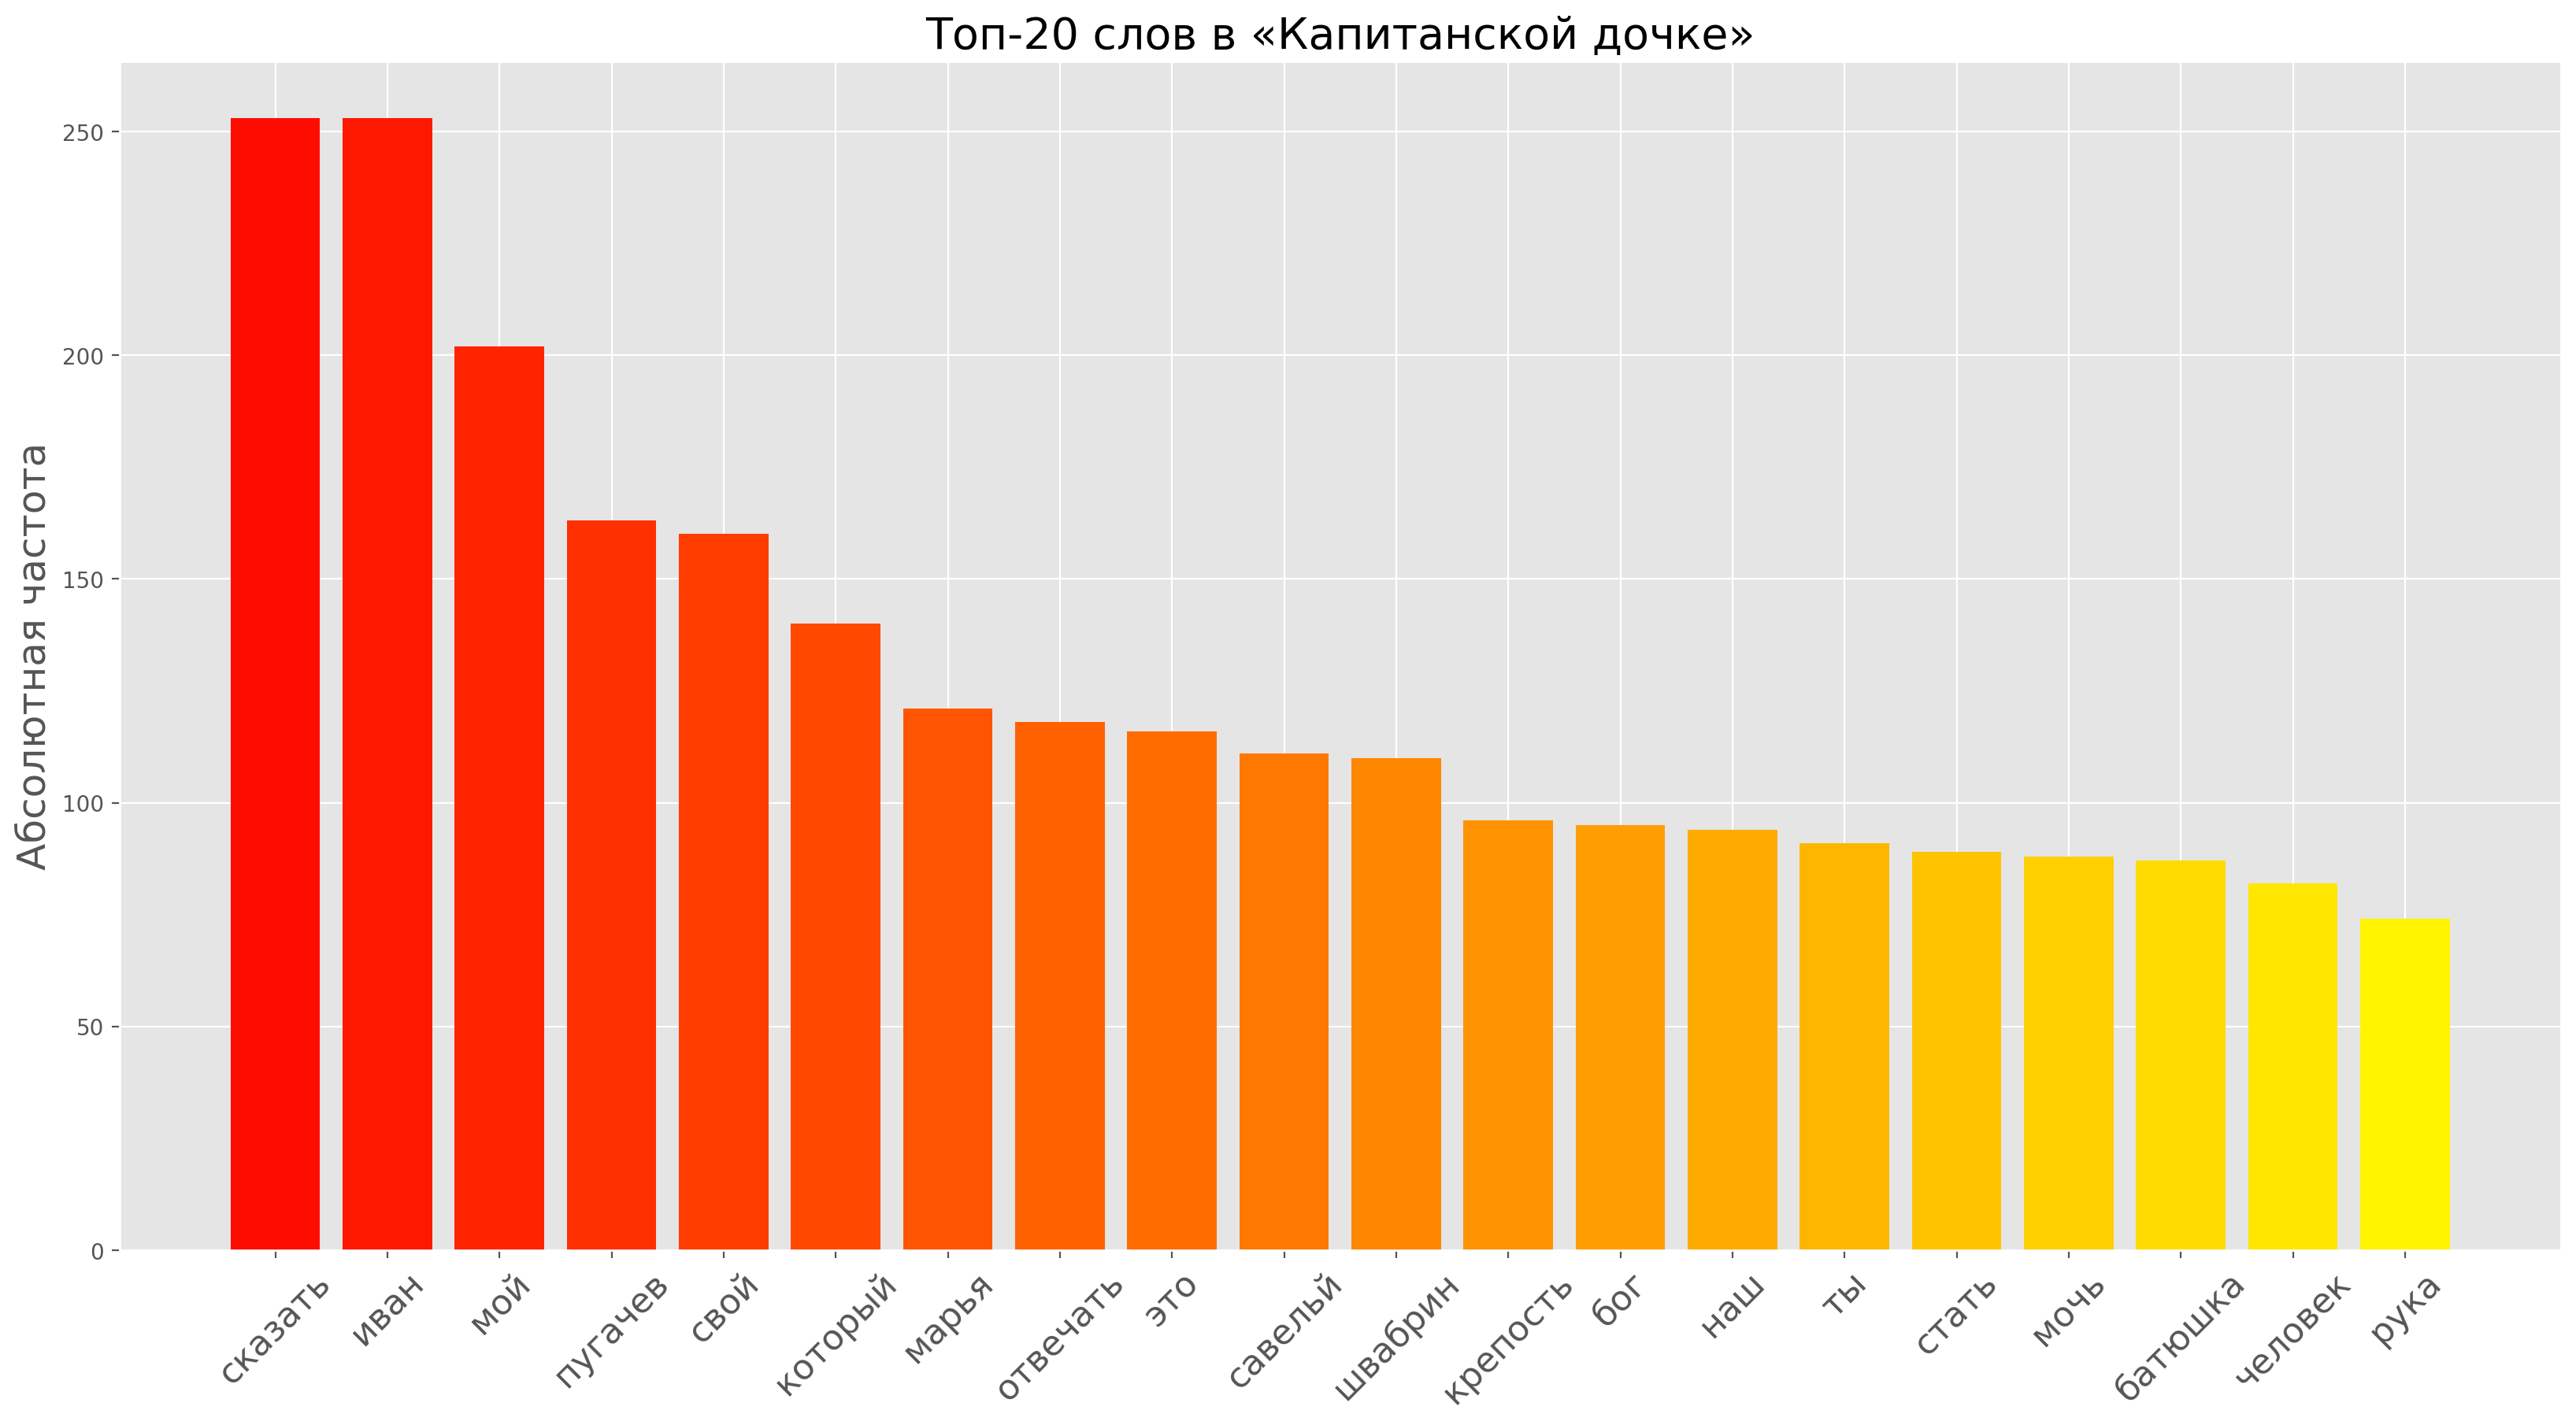

In [272]:
X = range(20)
Y = [el[1] for el in commons]
labels = [el[0] for el in commons]

colors = sns.color_palette('autumn', 20)

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(X, Y, color=colors)
plt.title('Топ-20 слов в «Капитанской дочке»',  fontsize=20)
plt.ylabel('Абсолютная частота',  fontsize=18)
plt.xticks(X, labels, rotation=45, fontsize=16)
plt.show()

# Найти среднюю длину предложения

In [282]:
from rusenttokenize import ru_sent_tokenize
sents = ru_sent_tokenize(' '.join(test.raw_content))

mean_words_len = sum([len(sent.split()) for sent in sents])/len(sents)
print('%.1f' % mean_words_len)

70.6


# Найти самую частотную часть речи до удаления стоп-слов и после удаления. Постороить графики частотности частей речи.

In [326]:
commons_1 = test.most_common(test.raw_content, 4)
commons_2 = test.most_common(test.no_stop_word, 4)

In [327]:
commons_1[0]

('и', 1254)

In [328]:
commons_2[0]

('сказал', 167)